In [1]:
pip install denmanlab

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.3/111.3 kB 7.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for denmanlab: filename=denmanlab-0.3-py3-none-any.whl size=123623 sha256=f8a97d964d1edc010824c487da9674e709efd66dc53fb3759aa9ce0a0f471487
  Stored in directory: /Users/grant/Library/Caches/pip/wheels/2c/62/b2/2053543a922ac9dfb65dfe8ba62bacdf129b7173a76b5c57bf
Successfully built denmanlab
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import h5py
import os,sys,glob, json
import _pickle as pkl
import dlab
from tqdm.notebook import tqdm
%matplotlib inline
%load_ext autoreload
%autoreload 2
plt.style.use('dark_background')

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [3]:
import matplotlib 
matplotlib.rcParams.update({'figure.max_open_warning': 0})

change experiment metadata to match yours here:

In [6]:
recording_folder = '/Volumes/s2/V1_LM/eOPN3_046/2023-08-01_11-40-19_EOPN3_046/'

experimenter = 'djd'
experiment_description= 'Denman Lab, University of Colorado Anschutz. Test of eArch axon silencing in V1'

# #spikeglx
# probes = [os.path.basename(f) for f in np.sort(glob.glob(recording_folder+'/*-AP*'))]

probeids = ['A','B','C'] 
probedepths = [1058,1035,3450] 

In [5]:
probes

[]

## stimulus time parsing
load timestamps from the sync channels of the recording

In [13]:
from open_ephys.analysis import Session

directory = recording_folder # for example

session = Session(directory)

In [14]:
events_df = pd.DataFrame(session.recordnodes[0].recordings[0].events)#

In [15]:
ni_df = events_df[events_df.stream_name == 'PXI-6133' ]

In [16]:
ni_df

,line,sample_number,timestamp,processor_id,stream_index,stream_name,state
2,8,4408859,146.647767,101,6,PXI-6133,0
11,8,4423874,147.148267,101,6,PXI-6133,1
16,8,4438889,147.648767,101,6,PXI-6133,0
26,8,4453904,148.149276,101,6,PXI-6133,1
28,8,4468919,148.649757,101,6,PXI-6133,0
...,...,...,...,...,...,...,...
472782,3,111833927,3727.483367,101,6,PXI-6133,1
472783,3,111834406,3727.499333,101,6,PXI-6133,0
472784,3,111834443,3727.500567,101,6,PXI-6133,1
472785,3,111834890,3727.515467,101,6,PXI-6133,0


In [17]:
ni_ts = {}
df_up = ni_df[ni_df.state==1]
for ch in ni_df.line.unique():
    ni_ts[ch] = df_up[df_up.line == ch].timestamp

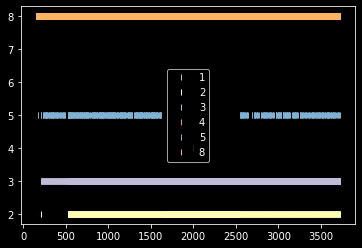

In [26]:
for ch in ([1,2,3,4,5,8]):
    plt.plot(np.array(ni_ts[ch]),
             np.ones(len(ni_ts[ch]))*ch,
             '|',label=ch)
plt.legend()

this cell likely change for each stimulus script, but should be the roughly same for different experiments with the same stimulus script. This one is for the `V1_LM.py`` stimulus script

In [42]:
# eye_camera_frame_times = ni_ts[7]
opto_df = ni_df[ni_df.line==5]
opto_off_times = opto_df[opto_df.state==0].timestamp
opto_on_times = opto_df[opto_df.state==1].timestamp
df_flash = ni_df[ni_df.line==3]
flash_times = df_flash[df_flash.state==1].timestamp[:100]#first 100 are flash onset
df_gratings = ni_df[ni_df.line==2]
gratings_times = df_gratings[df_gratings.state==1].timestamp[1:241]
df_strf = ni_df[ni_df.line==4]
arbMatrix_times = df_strf[df_strf.state==1].timestamp[:-1]

make sure to check all of the `_times` in the above cell to make sure they have the correct number of times with the correct approximate spacing between each (for example, between each trial for gratings or between in each frame for arbMatrix)

In [54]:
opto_on_times[:60]

309     168.185200
311     168.185333
874     208.249214
879     208.251480
925     211.247600
1147    226.262467
1237    232.267800
1327    238.273967
1461    247.282567
1507    250.284833
1553    253.287933
1643    259.292684
1689    262.311767
1735    265.317100
1781    268.318567
1827    271.321867
1873    274.324818
1919    277.326733
2009    283.332885
2055    286.336233
2233    298.346281
2279    301.349600
2325    304.352800
2415    310.356567
2549    319.366533
2595    322.368446
2641    325.371333
2687    328.373633
2777    334.379133
2867    340.385400
2913    343.388867
2959    346.391423
3005    349.393467
3051    352.396233
3097    355.398833
3143    358.401767
3189    361.411433
3279    367.427657
3369    373.432800
3459    379.438433
3593    388.447067
3639    391.450033
3685    394.452826
3731    397.456800
3777    400.458233
3911    409.466733
3957    412.469567
4047    418.475294
4269    433.489367
4315    436.492400
4361    439.495567
4495    448.503533
4585    454.

In [50]:
flash_times

880     208.267414
926     211.263967
971     214.266167
1015    217.268867
1059    220.272833
           ...    
5172    493.562500
5217    496.565633
5261    499.568533
5305    502.570933
5349    505.573767
Name: timestamp, Length: 100, dtype: float64

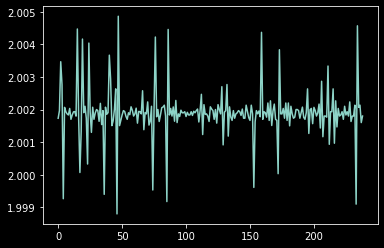

In [43]:
plt.plot(np.diff(gratings_times))

In [12]:
stimuli_times = {'luminance_flash':flash_times,
                 'gratings':gratings_times,
                 'spatioluminance_noise':arbMatrix_times,
                  }

In [13]:
gratings_pkl = pkl.load(open(glob.glob(stim_path+'/*gratings_o*')[0],'rb'))
# gratings_color_pkl = pkl.load(open(glob.glob(stim_path+'/*gratings_c*')[0],'rb'))

# arbMatrixcolor_pkl = pkl.load(open(glob.glob(stim_path+'/*color_*')[0],'rb'))
# arbMatrix_pkl = pkl.load(open(glob.glob(stim_path+'/*highspeed*')[0],'rb'))
arbMatrix_matrix = pkl.load(open(np.sort(glob.glob(stim_path+'/*'))[0],'rb'))
# arbMatrix_pkl2 = pkl.load(open(glob.glob(stim_path+'/*highspeed*')[1],'rb'))
# arbMatrix_matrix1 = pkl.load(open(np.sort(glob.glob(stim_path+'/*'))[1],'rb'))
# sweeps = json.load(open(glob.glob(stim_path+'/*.json')[0],'rb'))
#stimulus list
stimuli = {'luminance_flash':None,
           'gratings':gratings_pkl,
            'spatioluminance_noise':arbMatrix_matrix,
           } 

## Assemble NWB

In [14]:
import pynwb
from hdmf.backends.hdf5.h5_utils import H5DataIO
from hdmf.utils import StrDataset

In [106]:
from datetime import datetime
from dateutil.tz import tzlocal
from pynwb import NWBFile

nwbfile = NWBFile('Axon silencing with eArch3.0; ax11', 
                  recording_folder, 
                  datetime.now(tzlocal()),
                  experimenter=experimenter,
                  lab='Denman Lab',
                  institution='University of Colorado',
                  experiment_description=experiment_description,
                  session_id=os.path.basename(recording_folder))

add stimulus information

In [108]:
for stim in stimuli_times.keys():
    nwbfile.add_epoch(np.array(stimuli_times[stim])[0], 
                      np.array(stimuli_times[stim])[-1]+3.,
                      [stim])

In [107]:
nwbfile.add_trial_column('stimulus', 'the stimulus during this trial')

#optogenetics
nwbfile.add_trial_column('optogenetics_LED_state',    'whether or not the LED was on or off for this trial. 1=on,0=off. exact opto times are available in ____ field of NWB')

#flashCSD
nwbfile.add_trial_column('flash_luminance', 'the luminance of the flash on this trial. 1=bright,0=dark')

#gratings_orientation
nwbfile.add_trial_column('contrast', 'index of each trial into a matrix of images')
nwbfile.add_trial_column('temporal_frequency', 'index of each trial into a matrix of images')
nwbfile.add_trial_column('spatial_frequency', 'index of each trial into a matrix of images')
nwbfile.add_trial_column('orientation', 'index of each trial into a matrix of images')

#arbMatrix
nwbfile.add_trial_column('stimulus_index', 'index of each trial into a matrix of images')

stim_vals = {'optogenetics_LED_state':-1,
             'flash_luminance':-1,
             'contrast':-1,
             'temporal_frequency':-1,
             'spatial_frequency':-1,
             'orientation':-1,
             'stimulus_index':-1,}

lums = [0,1]#['white','black']
stim = 'luminance_flash'
for i,trial_start in enumerate(np.array(stimuli_times[stim])):
    if np.min(np.abs(opto_on_times - trial_start)) < 0.4: opto_state=1
    else: opto_state=0
    nwbfile.add_trial(start_time=trial_start, stop_time=trial_start+np.mean(np.diff(stimuli_times[stim])), stimulus=stim,
                      flash_luminance=lums[i%2],
                      optogenetics_LED_state=opto_state,
                      contrast = stim_vals['contrast'],
                     temporal_frequency = stim_vals['temporal_frequency'],
                     spatial_frequency = stim_vals['spatial_frequency'],
                     orientation = stim_vals['orientation'],
                      stimulus_index = stim_vals['stimulus_index'],
                     )

stim = 'gratings'
info = [stimuli[stim]['bgsweeptable'][ind] for ind in stimuli[stim]['bgsweeporder']]
for i,trial_start in enumerate(stimuli_times[stim]):
    nwbfile.add_trial(start_time=trial_start, stop_time=trial_start+np.mean(np.diff(stimuli_times[stim])), stimulus=stim,
                        flash_luminance = stim_vals['flash_luminance'],
                      stimulus_index = stim_vals['stimulus_index'],
                      contrast=info[i][0],
                     temporal_frequency=info[i][2],
                     spatial_frequency=info[i][3],
                     orientation=info[i][-2],
                     optogenetics_LED_state=info[i][-1])

stim = 'spatioluminance_noise'
for i,trial_start in enumerate(stimuli_times[stim]):
    nwbfile.add_trial(start_time=trial_start, stop_time=trial_start+np.mean(np.diff(stimuli_times[stim])),stimulus=stim,
                      flash_luminance = stim_vals['flash_luminance'],
                      stimulus_index=i,
                      contrast = stim_vals['contrast'],
                     temporal_frequency = stim_vals['temporal_frequency'],
                     spatial_frequency = stim_vals['spatial_frequency'],
                     orientation = stim_vals['orientation'],
                      optogenetics_LED_state = stim_vals['optogenetics_LED_state'])
    
 # stim = 'gratings_color'
# info = [stimuli[stim]['bgsweeptable'][ind] for ind in stimuli[stim]['bgsweeporder']]
# for i,trial_start in enumerate(stimuli_times[stim]):
#     nwbfile.add_trial(start_time=trial_start, stop_time=trial_start+np.mean(np.diff(stimuli_times[stim])), stimulus=stim,stimulus_info=[info[i]])

# stim = 'sweeping_bar'
# for i,trial_start in enumerate(stimuli_times[stim]):
#     nwbfile.add_trial(start_time=trial_start, stop_time=trial_start+np.mean(np.diff(stimuli_times[stim])), stimulus=stim,stimulus_info=[list(stimuli[stim]['ori'].values())[i]])


In [98]:
nwbfile.trials.to_dataframe()

,start_time,stop_time,stimulus,optogenetics_LED_state,flash_luminance,contrast,temporal_frequency,spatial_frequency,orientation,stimulus_index
id,,,,,,,,,,
0,8772.532871,8775.535713,luminance_flash,0,0,-1,-1,-1.0,-1,-1
1,8775.546567,8778.549409,luminance_flash,0,1,-1,-1,-1.0,-1,-1
2,8778.538233,8781.541075,luminance_flash,0,0,-1,-1,-1.0,-1,-1
3,8781.540867,8784.543709,luminance_flash,1,1,-1,-1,-1.0,-1,-1
4,8784.543867,8787.546709,luminance_flash,0,0,-1,-1,-1.0,-1,-1
...,...,...,...,...,...,...,...,...,...,...
14665,8614.984667,8615.034714,spatioluminance_noise,-1,-1,-1,-1,-1.0,-1,14395
14666,8615.034767,8615.084814,spatioluminance_noise,-1,-1,-1,-1,-1.0,-1,14396
14667,8615.084833,8615.134880,spatioluminance_noise,-1,-1,-1,-1,-1.0,-1,14397


## add optogenetics

In [109]:
np.array(opto_off_times).shape[0]

161

In [110]:
opto_states = pynwb.epoch.TimeIntervals(
    name="optogenetics_states",
    description="intervals for optical fiber, fiber at power = 1.5AU on cyclops driver. fiber 565nm, ",
)
opto_states.add_column(name="power", description="power of fiber")
opto_states.add_column(name="wavelength", description="wavelength of light")

for i in range(np.array(opto_off_times).shape[0]):
    opto_states.add_row(start_time=np.array(opto_on_times)[i], stop_time=np.array(opto_off_times)[i], power=1.5, wavelength=565)

nwbfile.add_time_intervals(opto_states)

optogenetics_states pynwb.epoch.TimeIntervals at 0x140181767651088
Fields:
  colnames: ['start_time' 'stop_time' 'power' 'wavelength']
  columns: (
    start_time <class 'hdmf.common.table.VectorData'>,
    stop_time <class 'hdmf.common.table.VectorData'>,
    power <class 'hdmf.common.table.VectorData'>,
    wavelength <class 'hdmf.common.table.VectorData'>
  )
  description: intervals for optical fiber, fiber at power = 1.5AU on cyclops driver. fiber 565nm, 
  id: id <class 'hdmf.common.table.ElementIdentifiers'>

### add ephys data
first add electrodes and raw data link

In [111]:
from dlab.nwbtools import df_from_phy, load_phy_template, option234_positions, multi_load_unit_data


In [112]:
df_units = multi_load_unit_data(recording_folder,probe_depths=probedepths)

/Users/danieldenman/opt/anaconda3/lib/python3.9/site-packages/dlab/nwbtools.py:487: RuntimeWarning: invalid value encountered in true_divide
  weights = weights/np.max(weights)


In [113]:
locations = ['VISp','VISl','VISa;CA1;DG;LP']
descriptions = ['Neuropixels1.0','NeuropixelsUltraAlpha','Neuropixels1.0'] 

In [114]:
device = nwbfile.create_device(name='DenmanLab_EphysRig1')

for i, probe in enumerate(probes):
    electrode_name = 'probe'+str(i)
    description = descriptions[i]
    location = locations[i]

    electrode_group = nwbfile.create_electrode_group(electrode_name,
                                                     description=description,
                                                     location=location,
                                                     device=device)
    for ch in range(option234_positions.shape[0]):
        nwbfile.add_electrode(x=option234_positions[ch,0],y=0.,z=option234_positions[0,1],imp=0.0,location='none',filtering='high pass 300Hz',group=electrode_group)
    
#     if len(glob.glob(os.path.join(recording_folder,probes[1])+'/*lf.b*')) > 0:
#         ephys_ts = pynwb.ecephys.ElectricalSeries('lfp_probe'+probeids[i],
#                                 data=H5DataIO(data=StrDataset(glob.glob(os.path.join(recording_folder,probes[1])+'/*lf.b*')[0]),    
#                                         link_data=True),
#                                 electrodes = electrode_group,
#                                 starting_time=0,
#                                 rate=2500,
#                                 resolution=0.001,
#                                 comments="V1, depth = 1500um",
#                                 description="V1, depth = 1500um")
#         nwbfile.add_acquisition(ephys_ts)

In [115]:
# nwbfile.add_unit_column('location', 'the anatomical location of this unit')
# nwbfile.add_unit_column('quality', 'the quality for the inference of this unit')
# nwbfile.add_unit_column('quality_ISIviolations', 'the quality for the inference of this unit')
# nwbfile.add_unit_column('quality_sn', 'the quality for the inference of this unit')
# nwbfile.add_unit_column('quality_distance', 'the quality for the inference of this unit')

nwbfile.add_unit_column('depth', 'the depth of this unit from the pia')
nwbfile.add_unit_column('xpos', 'the x position on probe')
nwbfile.add_unit_column('ypos', 'the y position on probe')
# nwbfile.add_unit_column('template', 'Kilosort template')
nwbfile.add_unit_column('label', 'user label')
nwbfile.add_unit_column('KSlabel', 'Kilosort label')
nwbfile.add_unit_column('KSamplitude', 'Kilosort amplitude')
nwbfile.add_unit_column('KScontamination', 'Kilosort ISI contamination')
nwbfile.add_unit_column('probe', 'probe ID')

labels =np.array(['noise','mua','good'])

for i,unit_row in df_units.iterrows():
    try: lbl = np.argwhere(unit_row.group==labels)[0][0]
    except: lbl=0
    try: klbl = np.argwhere(unit_row.KSlabel==labels)[0][0]
    except: klbl=0
    nwbfile.add_unit(id=int(unit_row.name), 
                     spike_times=unit_row.times,
                     electrodes = np.where(unit_row.waveform_weights > 0)[0],
                     waveform_mean = unit_row.template,
# #                       quality=0.95
                     depth = unit_row.depth,
                     xpos= unit_row.xpos,
                     ypos= unit_row.zpos,
#                      # template= unit_row.template,
                     label= lbl,
                     KSlabel= klbl,
                     KSamplitude= unit_row.KSamplitude,
                     KScontamination= unit_row.KScontamination,
                     probe= unit_row.probe,
                    )

In [116]:
nwb_path = os.path.join(recording_folder,recording_folder.split('/')[-5])+'.nwb'
with pynwb.NWBHDF5IO(nwb_path, 'w') as io:
    io.write(nwbfile)

# Load data

In [9]:
nwb_path = '/Volumes/DATA7/20230119_ax9_g0/20230119_ax9_g0.nwb'

In [5]:
nwb = h5py.File(nwb_path,'r')

In [6]:
nwb

<HDF5 file "20230119_ax9_g02.nwb" (mode r)>

# browse with NWBwidget

In [7]:
from pynwb import NWBHDF5IO
from nwbwidgets import nwb2widget

In [10]:
io = NWBHDF5IO(nwb_path, mode='r')
nwb_ = io.read()

nwb2widget(nwb_)

In [32]:
df_stim = nwb_.trials.to_dataframe()
df_opto = nwb_.get_time_intervals('optogenetics_states').to_dataframe()
df_units = nwb_.units.to_dataframe()

In [38]:
optogenetics_LED_state = []
for i,row in df_stim.iterrows():
    if np.min(np.abs(df_opto.start_time.values - row.start_time))<0.1:
        optogenetics_LED_state.extend([1])
    else:
        optogenetics_LED_state.extend([0])
df_stim['optogenetics_LED_state']= optogenetics_LED_state

## flash responses

In [19]:
import dlab.psth_and_raster as psth
from dlab.generalephys import cleanAxes
df1=df_units

plot one unit

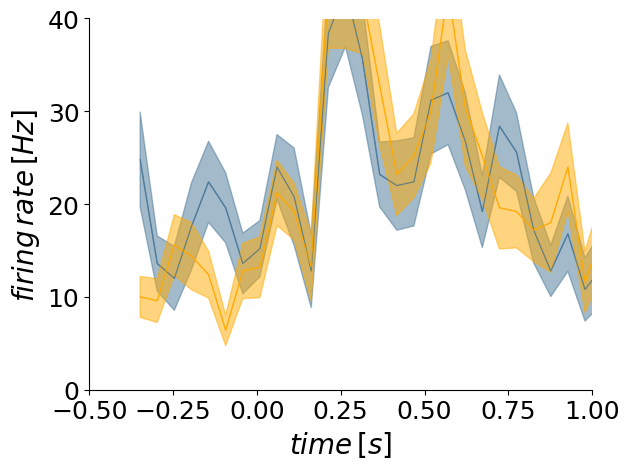

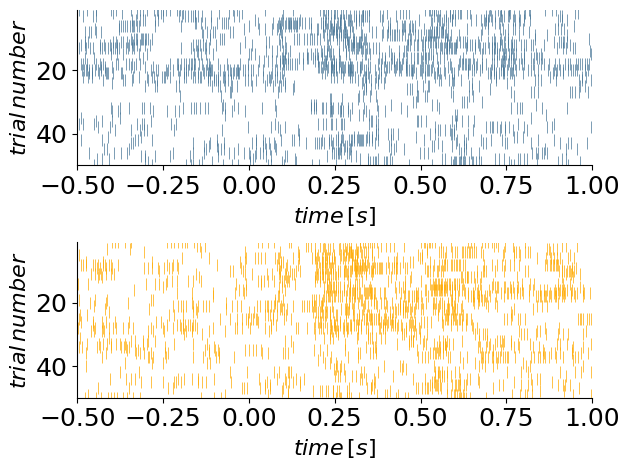

In [51]:
unit=103
df1 = df_units[df_units.probe=='B']
f,ax=plt.subplots(1,1)
psth.psth_line(times=df1[df1.index==unit].spike_times.values[0],
         triggers=df_stim[(df_stim.stimulus=='luminance_flash') & (df_stim.optogenetics_LED_state == 0)].start_time.values,
              ymax=40,binsize=0.05,axes=ax,color='#487697')
psth.psth_line(times=df1[df1.index==unit].spike_times.values[0],
         triggers=df_stim[(df_stim.stimulus=='luminance_flash') & (df_stim.optogenetics_LED_state == 1)].start_time.values,
              ymax=40,binsize=0.05,axes=ax,color='#ffaa00')
plt.tight_layout()
# f.savefig('/Users/danieljdenman/Academics/grants/applications/20230305_R01_NEI_resub/figures/eArch_LM_psth.eps')
# f.savefig('/Users/danieljdenman/Academics/grants/applications/20230305_R01_NEI_resub/figures/eArch_LM_psth.png')

f,ax=plt.subplots(2,1)
psth.raster(times=df1[df1.index==unit].spike_times.values[0],
         triggers=df_stim[(df_stim.stimulus=='luminance_flash') & (df_stim.optogenetics_LED_state == 0)].start_time.values,
              axes=ax[0],color='#487697',timeDomain=True,post=1.5,ms=8)
psth.raster(times=df1[df1.index==unit].spike_times.values[0],
         triggers=df_stim[(df_stim.stimulus=='luminance_flash') & (df_stim.optogenetics_LED_state == 1)].start_time.values,
              axes=ax[1],color='#ffaa00',timeDomain=True,post=1.5,ms=8)
for ax_ in ax: ax_.set_xlim(-0.5,1.0)
plt.tight_layout()
# f.savefig('/Users/danieljdenman/Academics/grants/applications/20230305_R01_NEI_resub/figures/eArch_LM_raster.eps')